In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import datetime
import pytz
import pvlib

In [2]:
PATH18 = "/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2018/CR3000/Sec/*.dat"


In [4]:
column_names = ['TIMESTAMP',
                'RECORD',
                'GHIP_SI02pt100',
                'GHIP_SMP11',
                'GHIP_SMP22',
                'GHIP_SPN1',
                'GHIT_SMP22',
                'TGHIP_SI02pt100', 
                'TGHIP_SI02pt100_dirty',
                'TGIP_SMP11_VENT',
                'DfHIP_SPN1', 
                'DfHIRP_SMP11',
                'DfHIT_SMP22',
                'DIF_GLO_REF_SPN1',
                'DNI_SHP1',
                'LW_SGR4', 
                'wind_speed', 
                'wind_direction']

In [3]:
datafiles = glob.glob(PATH18)
datafiles.sort()

In [5]:
datafiles

['/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2018/CR3000/Sec/SAPIENS_CR3000_Second_1.dat',
 '/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2018/CR3000/Sec/SAPIENS_CR3000_Second_2.dat',
 '/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2018/CR3000/Sec/SAPIENS_CR3000_Second_3.dat',
 '/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2018/CR3000/Sec/SAPIENS_CR3000_Second_4.dat',
 '/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2018/CR3000/Sec/SAPIENS_CR3000_Second_5.dat',
 '/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2018/CR3000/Sec/SAPIENS_CR3000_Second_6.dat',
 '/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2018/CR3000/Sec/SAPIENS_CR3000_Second_7.dat',
 '/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2018/CR3000/Sec/SAPIENS_CR3000_Second_8.dat']

In [6]:
file_duration = pd.DataFrame(index = datafiles , columns = ['start','end'])
compdata18 = pd.DataFrame(columns = column_names)

In [7]:
df1 = pd.read_csv(datafiles[0], usecols=column_names)[column_names] 

/Users/nataly/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (8,17,18,19,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [10]:
df1[['GHIP_SI02pt100','GHIP_SMP11','GHIP_SMP22','GHIP_SPN1','GHIT_SMP22',
         'TGHIP_SI02pt100','TGHIP_SI02pt100_dirty','TGIP_SMP11_VENT',
         'DfHIP_SPN1','DfHIRP_SMP11','DfHIT_SMP22','DIF_GLO_REF_SPN1',
         'DNI_SHP1','LW_SGR4', 'wind_speed','wind_direction']] = df1[['GHIP_SI02pt100',
         'GHIP_SMP11','GHIP_SMP22','GHIP_SPN1','GHIT_SMP22','TGHIP_SI02pt100',
         'TGHIP_SI02pt100_dirty','TGIP_SMP11_VENT','DfHIP_SPN1','DfHIRP_SMP11',
         'DfHIT_SMP22','DIF_GLO_REF_SPN1','DNI_SHP1','LW_SGR4', 'wind_speed',
         'wind_direction']].astype("float64")  
df1['TIMESTAMP'] = df1['TIMESTAMP'].astype(np.datetime64)
                 
df1 = df1.fillna(-9999)

In [11]:
df1.shape

(3441923, 18)

In [12]:
df1.head(5)

,TIMESTAMP,RECORD,GHIP_SI02pt100,GHIP_SMP11,GHIP_SMP22,GHIP_SPN1,GHIT_SMP22,TGHIP_SI02pt100,TGHIP_SI02pt100_dirty,TGIP_SMP11_VENT,DfHIP_SPN1,DfHIRP_SMP11,DfHIT_SMP22,DIF_GLO_REF_SPN1,DNI_SHP1,LW_SGR4,wind_speed,wind_direction
0,2017-12-13 14:32:40,506255,1019.0,1028.0,1047.0,1012.0,1028.0,907.0,910.0,973.0,637.6,617.0,767.0,7.071,240.1,404.5,1.14,35.0
1,2017-12-13 14:32:41,506256,1023.0,1037.0,1045.0,1008.0,1045.0,906.0,917.0,994.0,639.6,617.0,766.5,15.670,252.8,404.7,1.30,51.0
2,2017-12-13 14:32:42,506257,1073.0,1090.0,1086.0,1062.0,1095.0,950.0,967.0,1047.0,639.6,616.0,766.1,11.380,307.6,404.8,1.18,98.0
3,2017-12-13 14:32:43,506258,1131.0,1159.0,1146.0,1132.0,1160.0,1005.0,1027.0,1124.0,640.7,616.0,765.7,-0.830,378.0,404.9,0.96,285.0
4,2017-12-13 14:32:44,506259,1236.0,1272.0,1248.0,1233.0,1260.0,1100.0,1131.0,1230.0,642.4,616.0,765.2,3.045,485.8,405.0,0.91,258.0


In [13]:
df1.tail(5)

,TIMESTAMP,RECORD,GHIP_SI02pt100,GHIP_SMP11,GHIP_SMP22,GHIP_SPN1,GHIT_SMP22,TGHIP_SI02pt100,TGHIP_SI02pt100_dirty,TGIP_SMP11_VENT,DfHIP_SPN1,DfHIRP_SMP11,DfHIT_SMP22,DIF_GLO_REF_SPN1,DNI_SHP1,LW_SGR4,wind_speed,wind_direction
3441918,2018-01-17 18:57:02,94538,823.0,893.0,877.0,823.0,883.0,679.1,706.6,773.9,273.5,240.0,313.7,0.046,879.0,421.0,2.47,354.0
3441919,2018-01-17 18:57:03,94539,851.0,855.0,886.0,816.0,883.0,690.0,700.9,749.9,271.7,240.0,313.7,34.710,889.0,421.1,2.07,348.0
3441920,2018-01-17 18:57:04,94540,807.0,802.0,857.0,759.9,846.0,645.8,653.7,718.6,271.7,240.0,313.7,47.380,825.0,421.1,1.50,342.0
3441921,2018-01-17 18:57:05,94541,736.1,742.2,821.0,702.4,803.0,588.7,606.4,672.9,270.2,240.0,313.5,33.650,748.2,421.2,1.57,6.0
3441922,2018-01-17 18:57:06,94542,686.9,720.4,776.7,657.7,755.4,553.6,566.6,654.1,268.6,240.0,313.3,29.240,660.8,421.2,1.98,2.0


In [15]:
df1s = df1.sort_values(by=['TIMESTAMP'])

In [18]:
df1s.head(5)

,TIMESTAMP,RECORD,GHIP_SI02pt100,GHIP_SMP11,GHIP_SMP22,GHIP_SPN1,GHIT_SMP22,TGHIP_SI02pt100,TGHIP_SI02pt100_dirty,TGIP_SMP11_VENT,DfHIP_SPN1,DfHIRP_SMP11,DfHIT_SMP22,DIF_GLO_REF_SPN1,DNI_SHP1,LW_SGR4,wind_speed,wind_direction
0,2017-12-13 14:32:40,506255,1019.0,1028.0,1047.0,1012.0,1028.0,907.0,910.0,973.0,637.6,617.0,767.0,7.071,240.1,404.5,1.14,35.0
1,2017-12-13 14:32:41,506256,1023.0,1037.0,1045.0,1008.0,1045.0,906.0,917.0,994.0,639.6,617.0,766.5,15.670,252.8,404.7,1.30,51.0
2,2017-12-13 14:32:42,506257,1073.0,1090.0,1086.0,1062.0,1095.0,950.0,967.0,1047.0,639.6,616.0,766.1,11.380,307.6,404.8,1.18,98.0
3,2017-12-13 14:32:43,506258,1131.0,1159.0,1146.0,1132.0,1160.0,1005.0,1027.0,1124.0,640.7,616.0,765.7,-0.830,378.0,404.9,0.96,285.0
4,2017-12-13 14:32:44,506259,1236.0,1272.0,1248.0,1233.0,1260.0,1100.0,1131.0,1230.0,642.4,616.0,765.2,3.045,485.8,405.0,0.91,258.0


In [19]:
df1s.tail(5)

,TIMESTAMP,RECORD,GHIP_SI02pt100,GHIP_SMP11,GHIP_SMP22,GHIP_SPN1,GHIT_SMP22,TGHIP_SI02pt100,TGHIP_SI02pt100_dirty,TGIP_SMP11_VENT,DfHIP_SPN1,DfHIRP_SMP11,DfHIT_SMP22,DIF_GLO_REF_SPN1,DNI_SHP1,LW_SGR4,wind_speed,wind_direction
3382850,2018-01-18 12:29:58,157691,792.9,822.0,824.0,789.0,826.0,675.8,687.5,743.5,137.4,135.0,164.2,3.826,840.0,406.6,5.48,284.0
3382851,2018-01-18 12:29:59,157692,791.8,821.0,823.0,787.7,825.0,674.9,686.9,743.1,135.9,135.0,164.2,4.140,839.0,406.7,4.96,285.0
3382852,2018-01-18 12:30:00,157693,790.4,820.0,822.0,785.2,824.0,673.5,685.6,741.9,135.9,135.0,164.1,5.196,837.0,406.8,4.85,286.0
3382853,2018-01-18 12:30:01,157694,789.5,819.0,821.0,784.1,823.0,673.1,684.8,740.6,134.6,135.0,164.1,5.463,836.0,406.8,4.93,289.0
3382854,2018-01-18 12:30:02,157695,788.1,818.0,819.0,784.4,822.0,671.6,683.0,739.4,138.5,135.0,164.1,3.712,834.0,406.8,4.48,312.0


In [21]:
GHI =  ['GHIP_SI02pt100',
        'GHIP_SMP11',
        'GHIP_SMP22',
        'GHIP_SPN1',
        'GHIT_SMP22']

GTI = ['TGHIP_SI02pt100', 
       'TGHIP_SI02pt100_dirty',
       'TGIP_SMP11_VENT']
      
DIF = ['DfHIP_SPN1', 
       'DfHIRP_SMP11',
       'DfHIT_SMP22',
       'DIF_GLO_REF_SPN1']

DNI = ['DNI_SHP1']
  
WIND = ['wind_speed','wind_direction']

array([<AxesSubplot:xlabel='TIMESTAMP'>, <AxesSubplot:xlabel='TIMESTAMP'>,
       <AxesSubplot:xlabel='TIMESTAMP'>, <AxesSubplot:xlabel='TIMESTAMP'>,
       <AxesSubplot:xlabel='TIMESTAMP'>], dtype=object)

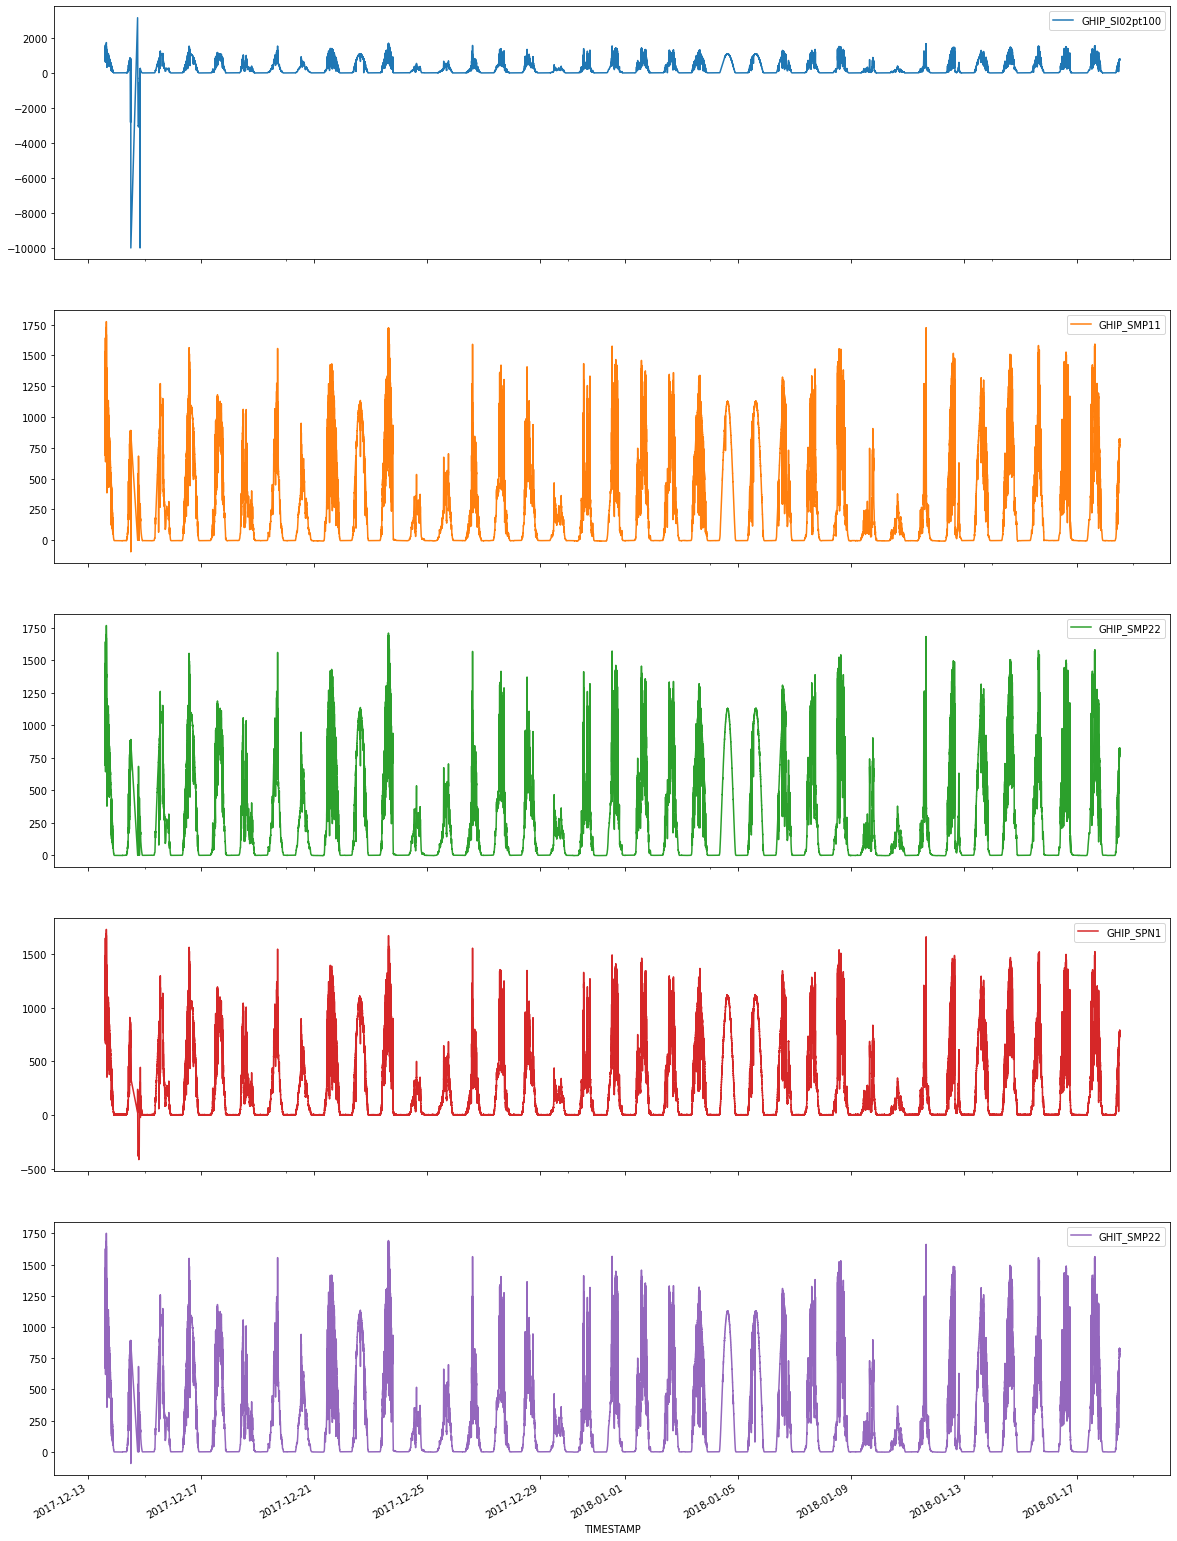

In [22]:
df1.plot(x = 'TIMESTAMP', y = GHI, subplots=True, figsize=(20,30))


In [25]:
df1s.duplicated(subset='TIMESTAMP', keep='first')

0          False
1          False
2          False
3          False
4          False
           ...  
3382850    False
3382851    False
3382852    False
3382853    False
3382854    False
Length: 3441923, dtype: bool

In [30]:
duplicatedf1s = df1s[df1s.duplicated(subset='TIMESTAMP', keep='first')]


In [31]:
duplicatedf1s

,TIMESTAMP,RECORD,GHIP_SI02pt100,GHIP_SMP11,GHIP_SMP22,GHIP_SPN1,GHIT_SMP22,TGHIP_SI02pt100,TGHIP_SI02pt100_dirty,TGIP_SMP11_VENT,DfHIP_SPN1,DfHIRP_SMP11,DfHIT_SMP22,DIF_GLO_REF_SPN1,DNI_SHP1,LW_SGR4,wind_speed,wind_direction
34,2017-12-13 14:33:14,506289,785.5,823.0,827.0,809.0,799.5,704.2,710.5,773.5,645.2,601.0,741.1,-23.190,55.6,404.6,2.05,13.0
78318,2017-12-13 14:33:15,506290,783.9,819.0,823.0,806.0,797.3,702.2,708.7,771.3,645.2,601.0,740.9,-21.810,54.0,404.5,2.66,359.0
36,2017-12-13 14:33:16,506291,783.3,818.0,820.0,805.0,795.3,701.8,708.1,769.1,645.2,601.0,740.8,-21.750,53.3,404.4,2.13,15.0
78320,2017-12-13 14:33:17,506292,780.1,814.0,817.0,805.0,791.6,699.2,704.7,764.8,648.3,601.0,740.6,-24.880,49.4,404.3,1.63,351.0
78321,2017-12-13 14:33:18,506293,777.5,809.0,812.0,800.0,789.8,696.2,701.8,762.3,646.4,601.0,740.5,-22.760,47.4,404.2,3.48,344.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3304557,2018-01-18 12:24:58,157408,726.7,752.4,755.0,728.1,757.6,617.3,627.9,680.4,132.4,129.0,158.5,-1.388,772.2,406.4,2.64,312.0
3304558,2018-01-18 12:24:59,157409,726.2,752.4,755.1,728.1,757.5,617.1,627.9,680.3,132.4,129.0,158.5,-1.921,772.0,405.8,3.60,312.0
3382569,2018-01-18 12:25:00,157410,727.0,752.5,755.1,726.8,757.5,617.6,628.3,680.4,131.3,129.0,158.5,0.229,772.1,405.8,3.93,292.0
3304560,2018-01-18 12:25:01,157411,728.4,753.4,755.4,729.1,758.9,618.7,629.6,681.3,132.4,129.0,158.5,-0.661,773.5,405.9,3.25,313.0


In [32]:
dduplicatedf1s = df1s[df1s.duplicated(subset='TIMESTAMP', keep='last')]
dduplicatedf1s

,TIMESTAMP,RECORD,GHIP_SI02pt100,GHIP_SMP11,GHIP_SMP22,GHIP_SPN1,GHIT_SMP22,TGHIP_SI02pt100,TGHIP_SI02pt100_dirty,TGIP_SMP11_VENT,DfHIP_SPN1,DfHIRP_SMP11,DfHIT_SMP22,DIF_GLO_REF_SPN1,DNI_SHP1,LW_SGR4,wind_speed,wind_direction
78317,2017-12-13 14:33:14,506289,785.5,823.0,827.0,809.0,799.5,704.2,710.5,773.5,645.2,601.0,741.1,-23.190,55.6,404.6,2.05,13.0
35,2017-12-13 14:33:15,506290,783.9,819.0,823.0,806.0,797.3,702.2,708.7,771.3,645.2,601.0,740.9,-21.810,54.0,404.5,2.66,359.0
78319,2017-12-13 14:33:16,506291,783.3,818.0,820.0,805.0,795.3,701.8,708.1,769.1,645.2,601.0,740.8,-21.750,53.3,404.4,2.13,15.0
37,2017-12-13 14:33:17,506292,780.1,814.0,817.0,805.0,791.6,699.2,704.7,764.8,648.3,601.0,740.6,-24.880,49.4,404.3,1.63,351.0
38,2017-12-13 14:33:18,506293,777.5,809.0,812.0,800.0,789.8,696.2,701.8,762.3,646.4,601.0,740.5,-22.760,47.4,404.2,3.48,344.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3382567,2018-01-18 12:24:58,157408,726.7,752.4,755.0,728.1,757.6,617.3,627.9,680.4,132.4,129.0,158.5,-1.388,772.2,406.4,2.64,312.0
3382568,2018-01-18 12:24:59,157409,726.2,752.4,755.1,728.1,757.5,617.1,627.9,680.3,132.4,129.0,158.5,-1.921,772.0,405.8,3.60,312.0
3304559,2018-01-18 12:25:00,157410,727.0,752.5,755.1,726.8,757.5,617.6,628.3,680.4,131.3,129.0,158.5,0.229,772.1,405.8,3.93,292.0
3382570,2018-01-18 12:25:01,157411,728.4,753.4,755.4,729.1,758.9,618.7,629.6,681.3,132.4,129.0,158.5,-0.661,773.5,405.9,3.25,313.0


In [33]:
duplicatedf1ss = duplicatedf1s.sort_values(by=['TIMESTAMP'])
dduplicatedf1ss = dduplicatedf1s.sort_values(by=['TIMESTAMP'])

In [34]:
duplicatedf1ss

,TIMESTAMP,RECORD,GHIP_SI02pt100,GHIP_SMP11,GHIP_SMP22,GHIP_SPN1,GHIT_SMP22,TGHIP_SI02pt100,TGHIP_SI02pt100_dirty,TGIP_SMP11_VENT,DfHIP_SPN1,DfHIRP_SMP11,DfHIT_SMP22,DIF_GLO_REF_SPN1,DNI_SHP1,LW_SGR4,wind_speed,wind_direction
34,2017-12-13 14:33:14,506289,785.5,823.0,827.0,809.0,799.5,704.2,710.5,773.5,645.2,601.0,741.1,-23.190,55.6,404.6,2.05,13.0
78318,2017-12-13 14:33:15,506290,783.9,819.0,823.0,806.0,797.3,702.2,708.7,771.3,645.2,601.0,740.9,-21.810,54.0,404.5,2.66,359.0
36,2017-12-13 14:33:16,506291,783.3,818.0,820.0,805.0,795.3,701.8,708.1,769.1,645.2,601.0,740.8,-21.750,53.3,404.4,2.13,15.0
78320,2017-12-13 14:33:17,506292,780.1,814.0,817.0,805.0,791.6,699.2,704.7,764.8,648.3,601.0,740.6,-24.880,49.4,404.3,1.63,351.0
78321,2017-12-13 14:33:18,506293,777.5,809.0,812.0,800.0,789.8,696.2,701.8,762.3,646.4,601.0,740.5,-22.760,47.4,404.2,3.48,344.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3304557,2018-01-18 12:24:58,157408,726.7,752.4,755.0,728.1,757.6,617.3,627.9,680.4,132.4,129.0,158.5,-1.388,772.2,406.4,2.64,312.0
3304558,2018-01-18 12:24:59,157409,726.2,752.4,755.1,728.1,757.5,617.1,627.9,680.3,132.4,129.0,158.5,-1.921,772.0,405.8,3.60,312.0
3382569,2018-01-18 12:25:00,157410,727.0,752.5,755.1,726.8,757.5,617.6,628.3,680.4,131.3,129.0,158.5,0.229,772.1,405.8,3.93,292.0
3304560,2018-01-18 12:25:01,157411,728.4,753.4,755.4,729.1,758.9,618.7,629.6,681.3,132.4,129.0,158.5,-0.661,773.5,405.9,3.25,313.0


In [35]:
dduplicatedf1ss

,TIMESTAMP,RECORD,GHIP_SI02pt100,GHIP_SMP11,GHIP_SMP22,GHIP_SPN1,GHIT_SMP22,TGHIP_SI02pt100,TGHIP_SI02pt100_dirty,TGIP_SMP11_VENT,DfHIP_SPN1,DfHIRP_SMP11,DfHIT_SMP22,DIF_GLO_REF_SPN1,DNI_SHP1,LW_SGR4,wind_speed,wind_direction
78317,2017-12-13 14:33:14,506289,785.5,823.0,827.0,809.0,799.5,704.2,710.5,773.5,645.2,601.0,741.1,-23.190,55.6,404.6,2.05,13.0
35,2017-12-13 14:33:15,506290,783.9,819.0,823.0,806.0,797.3,702.2,708.7,771.3,645.2,601.0,740.9,-21.810,54.0,404.5,2.66,359.0
78319,2017-12-13 14:33:16,506291,783.3,818.0,820.0,805.0,795.3,701.8,708.1,769.1,645.2,601.0,740.8,-21.750,53.3,404.4,2.13,15.0
37,2017-12-13 14:33:17,506292,780.1,814.0,817.0,805.0,791.6,699.2,704.7,764.8,648.3,601.0,740.6,-24.880,49.4,404.3,1.63,351.0
38,2017-12-13 14:33:18,506293,777.5,809.0,812.0,800.0,789.8,696.2,701.8,762.3,646.4,601.0,740.5,-22.760,47.4,404.2,3.48,344.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3382567,2018-01-18 12:24:58,157408,726.7,752.4,755.0,728.1,757.6,617.3,627.9,680.4,132.4,129.0,158.5,-1.388,772.2,406.4,2.64,312.0
3382568,2018-01-18 12:24:59,157409,726.2,752.4,755.1,728.1,757.5,617.1,627.9,680.3,132.4,129.0,158.5,-1.921,772.0,405.8,3.60,312.0
3304559,2018-01-18 12:25:00,157410,727.0,752.5,755.1,726.8,757.5,617.6,628.3,680.4,131.3,129.0,158.5,0.229,772.1,405.8,3.93,292.0
3382570,2018-01-18 12:25:01,157411,728.4,753.4,755.4,729.1,758.9,618.7,629.6,681.3,132.4,129.0,158.5,-0.661,773.5,405.9,3.25,313.0


In [47]:
compara2= duplicatedf1ss.sub(dduplicatedf1ss)

In [48]:
compara2.shape

(607625, 18)

In [49]:
compara2

,TIMESTAMP,RECORD,GHIP_SI02pt100,GHIP_SMP11,GHIP_SMP22,GHIP_SPN1,GHIT_SMP22,TGHIP_SI02pt100,TGHIP_SI02pt100_dirty,TGIP_SMP11_VENT,DfHIP_SPN1,DfHIRP_SMP11,DfHIT_SMP22,DIF_GLO_REF_SPN1,DNI_SHP1,LW_SGR4,wind_speed,wind_direction
34,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3441918,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3441919,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3441920,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3441921,0 days,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
compara3 = compara2.notna()

In [51]:
compara3

,TIMESTAMP,RECORD,GHIP_SI02pt100,GHIP_SMP11,GHIP_SMP22,GHIP_SPN1,GHIT_SMP22,TGHIP_SI02pt100,TGHIP_SI02pt100_dirty,TGIP_SMP11_VENT,DfHIP_SPN1,DfHIRP_SMP11,DfHIT_SMP22,DIF_GLO_REF_SPN1,DNI_SHP1,LW_SGR4,wind_speed,wind_direction
34,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
35,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
36,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
37,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
38,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3441918,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3441919,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3441920,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3441921,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [53]:
dduplicatedf1ss=dduplicatedf1ss.reindex_like(duplicatedf1ss)

In [54]:
dduplicatedf1ss

,TIMESTAMP,RECORD,GHIP_SI02pt100,GHIP_SMP11,GHIP_SMP22,GHIP_SPN1,GHIT_SMP22,TGHIP_SI02pt100,TGHIP_SI02pt100_dirty,TGIP_SMP11_VENT,DfHIP_SPN1,DfHIRP_SMP11,DfHIT_SMP22,DIF_GLO_REF_SPN1,DNI_SHP1,LW_SGR4,wind_speed,wind_direction
34,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78318,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78320,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78321,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3304557,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3304558,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3382569,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3304560,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
duplicatedf1ss

,TIMESTAMP,RECORD,GHIP_SI02pt100,GHIP_SMP11,GHIP_SMP22,GHIP_SPN1,GHIT_SMP22,TGHIP_SI02pt100,TGHIP_SI02pt100_dirty,TGIP_SMP11_VENT,DfHIP_SPN1,DfHIRP_SMP11,DfHIT_SMP22,DIF_GLO_REF_SPN1,DNI_SHP1,LW_SGR4,wind_speed,wind_direction
34,2017-12-13 14:33:14,506289,785.5,823.0,827.0,809.0,799.5,704.2,710.5,773.5,645.2,601.0,741.1,-23.190,55.6,404.6,2.05,13.0
78318,2017-12-13 14:33:15,506290,783.9,819.0,823.0,806.0,797.3,702.2,708.7,771.3,645.2,601.0,740.9,-21.810,54.0,404.5,2.66,359.0
36,2017-12-13 14:33:16,506291,783.3,818.0,820.0,805.0,795.3,701.8,708.1,769.1,645.2,601.0,740.8,-21.750,53.3,404.4,2.13,15.0
78320,2017-12-13 14:33:17,506292,780.1,814.0,817.0,805.0,791.6,699.2,704.7,764.8,648.3,601.0,740.6,-24.880,49.4,404.3,1.63,351.0
78321,2017-12-13 14:33:18,506293,777.5,809.0,812.0,800.0,789.8,696.2,701.8,762.3,646.4,601.0,740.5,-22.760,47.4,404.2,3.48,344.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3304557,2018-01-18 12:24:58,157408,726.7,752.4,755.0,728.1,757.6,617.3,627.9,680.4,132.4,129.0,158.5,-1.388,772.2,406.4,2.64,312.0
3304558,2018-01-18 12:24:59,157409,726.2,752.4,755.1,728.1,757.5,617.1,627.9,680.3,132.4,129.0,158.5,-1.921,772.0,405.8,3.60,312.0
3382569,2018-01-18 12:25:00,157410,727.0,752.5,755.1,726.8,757.5,617.6,628.3,680.4,131.3,129.0,158.5,0.229,772.1,405.8,3.93,292.0
3304560,2018-01-18 12:25:01,157411,728.4,753.4,755.4,729.1,758.9,618.7,629.6,681.3,132.4,129.0,158.5,-0.661,773.5,405.9,3.25,313.0


In [56]:
datafiles

['/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2018/CR3000/Sec/SAPIENS_CR3000_Second_1.dat',
 '/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2018/CR3000/Sec/SAPIENS_CR3000_Second_2.dat',
 '/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2018/CR3000/Sec/SAPIENS_CR3000_Second_3.dat',
 '/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2018/CR3000/Sec/SAPIENS_CR3000_Second_4.dat',
 '/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2018/CR3000/Sec/SAPIENS_CR3000_Second_5.dat',
 '/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2018/CR3000/Sec/SAPIENS_CR3000_Second_6.dat',
 '/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2018/CR3000/Sec/SAPIENS_CR3000_Second_7.dat',
 '/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2018/CR3000/Sec/SAPIENS_CR3000_Second_8.dat']

In [57]:
column_names

['TIMESTAMP',
 'RECORD',
 'GHIP_SI02pt100',
 'GHIP_SMP11',
 'GHIP_SMP22',
 'GHIP_SPN1',
 'GHIT_SMP22',
 'TGHIP_SI02pt100',
 'TGHIP_SI02pt100_dirty',
 'TGIP_SMP11_VENT',
 'DfHIP_SPN1',
 'DfHIRP_SMP11',
 'DfHIT_SMP22',
 'DIF_GLO_REF_SPN1',
 'DNI_SHP1',
 'LW_SGR4',
 'wind_speed',
 'wind_direction']

In [58]:
file_duration = pd.DataFrame(index = datafiles , columns = ['Tstart','Tend', 'Istart','Iend'])
compdata18 = pd.DataFrame(columns = column_names)

In [59]:
for path in datafiles:
    df = pd.read_csv(path, usecols=column_names, index_col='RECORD')[column_names]        
    df[['GHIP_SI02pt100','GHIP_SMP11','GHIP_SMP22','GHIP_SPN1','GHIT_SMP22',
         'TGHIP_SI02pt100','TGHIP_SI02pt100_dirty','TGIP_SMP11_VENT',
         'DfHIP_SPN1','DfHIRP_SMP11','DfHIT_SMP22','DIF_GLO_REF_SPN1',
         'DNI_SHP1','LW_SGR4', 'wind_speed','wind_direction']] = df[['GHIP_SI02pt100',
         'GHIP_SMP11','GHIP_SMP22','GHIP_SPN1','GHIT_SMP22','TGHIP_SI02pt100',
         'TGHIP_SI02pt100_dirty','TGIP_SMP11_VENT','DfHIP_SPN1','DfHIRP_SMP11',
         'DfHIT_SMP22','DIF_GLO_REF_SPN1','DNI_SHP1','LW_SGR4', 'wind_speed',
         'wind_direction']].astype("float64")  
    df['TIMESTAMP'] = df['TIMESTAMP'].astype(np.datetime64)
    df = df.fillna(-9999)
    df = df.sort_values(by=['TIMESTAMP'])
    file_duration.at[path,'Tstart']= df.iloc[0,1]
    file_duration.at[path,'Tend'  ]= df.iloc[-1,1]    
    file_duration.at[path,'Istart']= df.iloc[0,0]
    file_duration.at[path,'Iend'  ]= df.iloc[-1,0]    


/Users/nataly/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (8,17,18,19,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/nataly/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


KeyError: "['RECORD'] not in index"

In [69]:
column_names = ['RECORD',
                'TIMESTAMP',
                'GHIP_SI02pt100',
                'GHIP_SMP11',
                'GHIP_SMP22',
                'GHIP_SPN1',
                'GHIT_SMP22',
                'TGHIP_SI02pt100', 
                'TGHIP_SI02pt100_dirty',
                'TGIP_SMP11_VENT',
                'DfHIP_SPN1', 
                'DfHIRP_SMP11',
                'DfHIT_SMP22',
                'DIF_GLO_REF_SPN1',
                'DNI_SHP1',
                'LW_SGR4', 
                'wind_speed', 
                'wind_direction']
    
df = pd.read_csv(datafiles[1], usecols=column_names,index_col=1)   


In [70]:
df

,TIMESTAMP,DNI_SHP1,LW_SGR4,GHIT_SMP22,GHIP_SMP22,GHIP_SMP11,GHIP_SPN1,GHIP_SI02pt100,DfHIT_SMP22,DfHIRP_SMP11,DfHIP_SPN1,TGIP_SMP11_VENT,TGHIP_SI02pt100,TGHIP_SI02pt100_dirty,wind_speed,wind_direction,DIF_GLO_REF_SPN1
RECORD,,,,,,,,,,,,,,,,,
80247,2018-01-17 14:58:22,43.9,434.2,725.2,748.4,749.3,726.6,733.8,683.6,582.0,627.4,717.2,682.1,687.7,1.2,17,7.259
80248,2018-01-17 14:58:23,45.0,434.1,726.6,749.7,750.8,725.4,735.3,684.0,582.0,626.2,718.9,683.5,689.1,1.12,15,9.840
80249,2018-01-17 14:58:24,46.6,434.0,728.3,751.1,752.4,729.1,736.8,684.5,582.0,627.4,720.4,685.0,690.6,0.98,4,7.743
80250,2018-01-17 14:58:25,47.6,433.8,729.7,752.8,753.8,732.0,738.3,684.8,582.0,630.5,721.8,686.4,692.1,1.24,27,6.310
80251,2018-01-17 14:58:26,49.0,433.6,731.2,754.2,755.3,731.4,739.9,685.2,583.0,627.4,723.3,687.8,693.4,0.57,2,8.510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597511,2018-01-23 15:46:16,326.5,423.5,760.0,774.6,773.1,765.5,748.2,426.1,354.0,371.9,734.1,695.5,697.8,2.65,273,-17.320
597512,2018-01-23 15:46:17,325.7,423.5,759.4,774.4,772.9,765.3,746.5,426.2,354.0,371.9,733.9,693.9,696.4,1.42,256,-18.810
597513,2018-01-23 15:46:18,322.8,423.5,757.1,773.2,770.2,762.8,744.7,426.3,354.0,373.7,731.7,692.4,694.9,1.52,282,-18.110


In [ ]:
for path in datafiles:
    df = pd.read_csv(path, usecols=column_names, index_col=1)[column_names]        
    df[['GHIP_SI02pt100','GHIP_SMP11','GHIP_SMP22','GHIP_SPN1','GHIT_SMP22',
         'TGHIP_SI02pt100','TGHIP_SI02pt100_dirty','TGIP_SMP11_VENT',
         'DfHIP_SPN1','DfHIRP_SMP11','DfHIT_SMP22','DIF_GLO_REF_SPN1',
         'DNI_SHP1','LW_SGR4', 'wind_speed','wind_direction']] = df[['GHIP_SI02pt100',
         'GHIP_SMP11','GHIP_SMP22','GHIP_SPN1','GHIT_SMP22','TGHIP_SI02pt100',
         'TGHIP_SI02pt100_dirty','TGIP_SMP11_VENT','DfHIP_SPN1','DfHIRP_SMP11',
         'DfHIT_SMP22','DIF_GLO_REF_SPN1','DNI_SHP1','LW_SGR4', 'wind_speed',
         'wind_direction']].astype("float64")  
    df['TIMESTAMP'] = df['TIMESTAMP'].astype(np.datetime64)
    df = df.fillna(-9999)
    df = df.sort_values(by=['TIMESTAMP'])
    file_duration.at[path,'start']= df.iloc[0,1]
    file_duration.at[path,'end'  ]= df.iloc[-1,1]    
    file_duration.at[path,'start']= df.iloc[0,0]
    file_duration.at[path,'end'  ]= df.iloc[-1,0]    


In [72]:
file_duration.at[path,'Tstart']= df.iloc[0,1]
file_duration.at[path,'Tend'  ]= df.iloc[-1,1]    
file_duration.at[path,'Istart']= df.iloc[0,0]
file_duration.at[path,'Iend'  ]= df.iloc[-1,0]    

In [73]:
file_duration

,Tstart,Tend,Istart,Iend,start,end
/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2018/CR3000/Sec/SAPIENS_CR3000_Second_1.dat,43.9,321.8,2018-01-17 14:58:22,2018-01-23 15:46:21,43.9,321.8
/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2018/CR3000/Sec/SAPIENS_CR3000_Second_2.dat,NaN,NaN,NaN,NaN,NaN,NaN
/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2018/CR3000/Sec/SAPIENS_CR3000_Second_3.dat,NaN,NaN,NaN,NaN,NaN,NaN
/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2018/CR3000/Sec/SAPIENS_CR3000_Second_4.dat,NaN,NaN,NaN,NaN,NaN,NaN
/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2018/CR3000/Sec/SAPIENS_CR3000_Second_5.dat,NaN,NaN,NaN,NaN,NaN,NaN
/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2018/CR3000/Sec/SAPIENS_CR3000_Second_6.dat,NaN,NaN,NaN,NaN,NaN,NaN
/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2018/CR3000/Sec/SAPIENS_CR3000_Second_7.dat,NaN,NaN,NaN,NaN,NaN,NaN
/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2018/CR3000/Sec/SAPIENS_CR3000_Second_8.dat,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
df[RECORD[0]]

NameError: name 'RECORD' is not defined

In [81]:
df.loc[1]

KeyError: 1

In [82]:
df.shape

(595217, 17)

In [85]:
df.dtypes

TIMESTAMP                 object
DNI_SHP1                 float64
LW_SGR4                  float64
GHIT_SMP22               float64
GHIP_SMP22               float64
GHIP_SMP11               float64
GHIP_SPN1                float64
GHIP_SI02pt100           float64
DfHIT_SMP22              float64
DfHIRP_SMP11             float64
DfHIP_SPN1               float64
TGIP_SMP11_VENT          float64
TGHIP_SI02pt100          float64
TGHIP_SI02pt100_dirty    float64
wind_speed                object
wind_direction            object
DIF_GLO_REF_SPN1         float64
dtype: object

In [88]:
df.index[0]

80247

In [89]:
df.index[-1]

597515

In [90]:
df.index

Int64Index([ 80247,  80248,  80249,  80250,  80251,  80252,  80253,  80254,
             80255,  80256,
            ...
            597506, 597507, 597508, 597509, 597510, 597511, 597512, 597513,
            597514, 597515],
           dtype='int64', name='RECORD', length=595217)

In [103]:
for path in datafiles:
    dfN = pd.read_csv(path, usecols=column_names)[column_names]        
    dfN[['GHIP_SI02pt100','GHIP_SMP11','GHIP_SMP22','GHIP_SPN1','GHIT_SMP22',
         'TGHIP_SI02pt100','TGHIP_SI02pt100_dirty','TGIP_SMP11_VENT',
         'DfHIP_SPN1','DfHIRP_SMP11','DfHIT_SMP22','DIF_GLO_REF_SPN1',
         'DNI_SHP1','LW_SGR4', 'wind_speed','wind_direction']] = dfN[['GHIP_SI02pt100',
         'GHIP_SMP11','GHIP_SMP22','GHIP_SPN1','GHIT_SMP22','TGHIP_SI02pt100',
         'TGHIP_SI02pt100_dirty','TGIP_SMP11_VENT','DfHIP_SPN1','DfHIRP_SMP11',
         'DfHIT_SMP22','DIF_GLO_REF_SPN1','DNI_SHP1','LW_SGR4', 'wind_speed',
         'wind_direction']].astype("float64")  
    dfN['TIMESTAMP'] = dfN['TIMESTAMP'].astype(np.datetime64)
    dfN = dfN.fillna(-9999)
    dfN = dfN.sort_values(by=['TIMESTAMP'])
    file_duration.at[path,'Tstart']= dfN.iloc[0,1]
    file_duration.at[path,'Tend'  ]= dfN.iloc[-1,1]    
    file_duration.at[path,'Istart']= dfN.iloc[0,0]
    file_duration.at[path,'Iend'  ]= dfN.iloc[-1,0]    

/Users/nataly/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (8,17,18,19,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [104]:
file_duration

,Tstart,Tend,Istart,Iend,start,end
/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2018/CR3000/Sec/SAPIENS_CR3000_Second_1.dat,2017-12-13 14:32:40,2018-01-18 12:30:02,506255,157695,43.9,321.8
/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2018/CR3000/Sec/SAPIENS_CR3000_Second_2.dat,2018-01-17 14:58:22,2018-01-23 15:46:21,80247,597515,NaN,NaN
/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2018/CR3000/Sec/SAPIENS_CR3000_Second_3.dat,2018-01-23 15:50:02,2018-03-01 19:00:05,0,3184167,NaN,NaN
/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2018/CR3000/Sec/SAPIENS_CR3000_Second_4.dat,2018-01-23 15:50:02,2018-08-31 23:50:00,0,5197349,NaN,NaN
/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2018/CR3000/Sec/SAPIENS_CR3000_Second_5.dat,2018-08-31 23:50:01,2018-09-30 23:50:00,5197350,194794,NaN,NaN
/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2018/CR3000/Sec/SAPIENS_CR3000_Second_6.dat,2018-09-30 23:50:01,2018-10-31 23:49:59,194795,97849,NaN,NaN
/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2018/CR3000/Sec/SAPIENS_CR3000_Second_7.dat,2018-10-31 23:50:00,2018-12-03 18:10:00,97850,2922104,NaN,NaN
/Users/nataly/opt/AnacondaProjects/SAPIENS/original/2018/CR3000/Sec/SAPIENS_CR3000_Second_8.dat,2018-12-03 18:10:01,2018-12-31 17:20:04,2922105,5337777,NaN,NaN


In [97]:
df

,TIMESTAMP,DNI_SHP1,LW_SGR4,GHIT_SMP22,GHIP_SMP22,GHIP_SMP11,GHIP_SPN1,GHIP_SI02pt100,DfHIT_SMP22,DfHIRP_SMP11,DfHIP_SPN1,TGIP_SMP11_VENT,TGHIP_SI02pt100,TGHIP_SI02pt100_dirty,wind_speed,wind_direction,DIF_GLO_REF_SPN1
RECORD,,,,,,,,,,,,,,,,,
80247,2018-01-17 14:58:22,43.9,434.2,725.2,748.4,749.3,726.6,733.8,683.6,582.0,627.4,717.2,682.1,687.7,1.2,17,7.259
80248,2018-01-17 14:58:23,45.0,434.1,726.6,749.7,750.8,725.4,735.3,684.0,582.0,626.2,718.9,683.5,689.1,1.12,15,9.840
80249,2018-01-17 14:58:24,46.6,434.0,728.3,751.1,752.4,729.1,736.8,684.5,582.0,627.4,720.4,685.0,690.6,0.98,4,7.743
80250,2018-01-17 14:58:25,47.6,433.8,729.7,752.8,753.8,732.0,738.3,684.8,582.0,630.5,721.8,686.4,692.1,1.24,27,6.310
80251,2018-01-17 14:58:26,49.0,433.6,731.2,754.2,755.3,731.4,739.9,685.2,583.0,627.4,723.3,687.8,693.4,0.57,2,8.510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597511,2018-01-23 15:46:16,326.5,423.5,760.0,774.6,773.1,765.5,748.2,426.1,354.0,371.9,734.1,695.5,697.8,2.65,273,-17.320
597512,2018-01-23 15:46:17,325.7,423.5,759.4,774.4,772.9,765.3,746.5,426.2,354.0,371.9,733.9,693.9,696.4,1.42,256,-18.810
597513,2018-01-23 15:46:18,322.8,423.5,757.1,773.2,770.2,762.8,744.7,426.3,354.0,373.7,731.7,692.4,694.9,1.52,282,-18.110


In [99]:
df.reset_index

<bound method DataFrame.reset_index of                   TIMESTAMP  DNI_SHP1  LW_SGR4  GHIT_SMP22  GHIP_SMP22  \
RECORD                                                                   
80247   2018-01-17 14:58:22      43.9    434.2       725.2       748.4   
80248   2018-01-17 14:58:23      45.0    434.1       726.6       749.7   
80249   2018-01-17 14:58:24      46.6    434.0       728.3       751.1   
80250   2018-01-17 14:58:25      47.6    433.8       729.7       752.8   
80251   2018-01-17 14:58:26      49.0    433.6       731.2       754.2   
...                     ...       ...      ...         ...         ...   
597511  2018-01-23 15:46:16     326.5    423.5       760.0       774.6   
597512  2018-01-23 15:46:17     325.7    423.5       759.4       774.4   
597513  2018-01-23 15:46:18     322.8    423.5       757.1       773.2   
597514  2018-01-23 15:46:20     321.7    423.5       756.4       771.6   
597515  2018-01-23 15:46:21     321.8    423.5       756.6       771.3   

In [100]:
df

,TIMESTAMP,DNI_SHP1,LW_SGR4,GHIT_SMP22,GHIP_SMP22,GHIP_SMP11,GHIP_SPN1,GHIP_SI02pt100,DfHIT_SMP22,DfHIRP_SMP11,DfHIP_SPN1,TGIP_SMP11_VENT,TGHIP_SI02pt100,TGHIP_SI02pt100_dirty,wind_speed,wind_direction,DIF_GLO_REF_SPN1
RECORD,,,,,,,,,,,,,,,,,
80247,2018-01-17 14:58:22,43.9,434.2,725.2,748.4,749.3,726.6,733.8,683.6,582.0,627.4,717.2,682.1,687.7,1.2,17,7.259
80248,2018-01-17 14:58:23,45.0,434.1,726.6,749.7,750.8,725.4,735.3,684.0,582.0,626.2,718.9,683.5,689.1,1.12,15,9.840
80249,2018-01-17 14:58:24,46.6,434.0,728.3,751.1,752.4,729.1,736.8,684.5,582.0,627.4,720.4,685.0,690.6,0.98,4,7.743
80250,2018-01-17 14:58:25,47.6,433.8,729.7,752.8,753.8,732.0,738.3,684.8,582.0,630.5,721.8,686.4,692.1,1.24,27,6.310
80251,2018-01-17 14:58:26,49.0,433.6,731.2,754.2,755.3,731.4,739.9,685.2,583.0,627.4,723.3,687.8,693.4,0.57,2,8.510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597511,2018-01-23 15:46:16,326.5,423.5,760.0,774.6,773.1,765.5,748.2,426.1,354.0,371.9,734.1,695.5,697.8,2.65,273,-17.320
597512,2018-01-23 15:46:17,325.7,423.5,759.4,774.4,772.9,765.3,746.5,426.2,354.0,371.9,733.9,693.9,696.4,1.42,256,-18.810
597513,2018-01-23 15:46:18,322.8,423.5,757.1,773.2,770.2,762.8,744.7,426.3,354.0,373.7,731.7,692.4,694.9,1.52,282,-18.110
